In [331]:
import timeit
start_time = timeit.default_timer()
#parameters
directory ="./"
file_name = "vector_title_content.csv"
# file_name ="vector_title_content_tfidf_publication_1hot.csv"
# "tfidf_441_0.18288810824609675_441_0.09000000000000001.csv"

import pandas as pd
import numpy as np
#read data
df = pd.read_csv(directory+file_name)
print("datasize: ",len(df))
df.head()

#features
X = df.iloc[:,1:]
#label
y = df.iloc[:,0]
#split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


#load classifiers and produce model on training data
# preform prediction on testing data
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble        import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model    import SGDClassifier
from sklearn.naive_bayes     import GaussianNB
from sklearn.svm             import SVC
from sklearn import tree,neighbors
# Fit estimators
ESTIMATORS = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest"      : RandomForestClassifier(),
    "Gradient Decent"    : SGDClassifier(),
    "SVC"                : SVC(),
    "DecisionTree"       : tree.DecisionTreeClassifier(),
    "GradientBoosting"     :GradientBoostingClassifier(),
    "neighbors"     :  neighbors.KNeighborsClassifier(),
    
}

y_test_predict = dict()
y_train_predict = dict()
# scores = dict()

for name, estimator in ESTIMATORS.items():
    
    estimator.fit(x_train, y_train)
    y_test_predict[name] = estimator.predict(x_test)
    y_train_predict[name] = estimator.predict(x_train)
    
    print(name +" ready")
#     scores[name] = estimator.score(x_test, y_test)
#     print(scores[name])


In [335]:
print(__doc__)
import itertools
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix
# classifier = svm.SVC(kernel='linear', C=0.01)
# y_pred = classifier.fit(X_train, y_train).predict(X_test)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Automatically created module for IPython interactive environment


Normalized confusion matrix


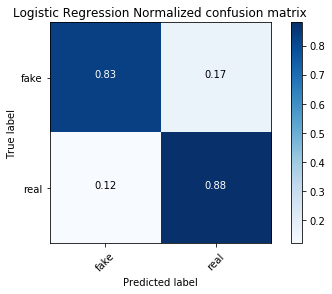

Normalized confusion matrix


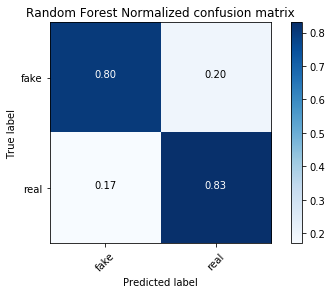

Normalized confusion matrix


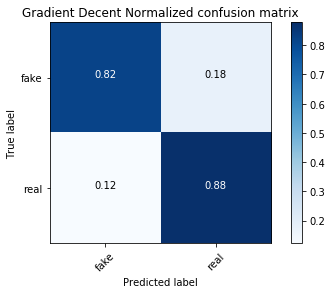

Normalized confusion matrix


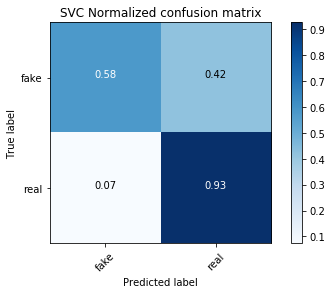

Normalized confusion matrix


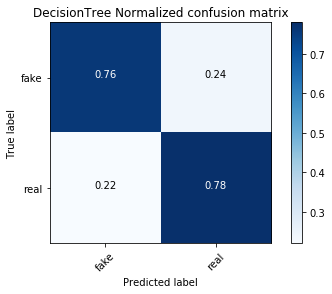

Normalized confusion matrix


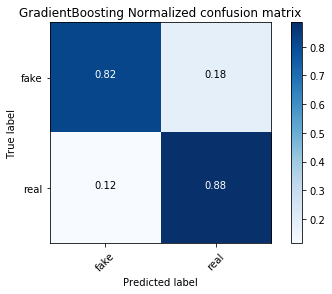

Normalized confusion matrix


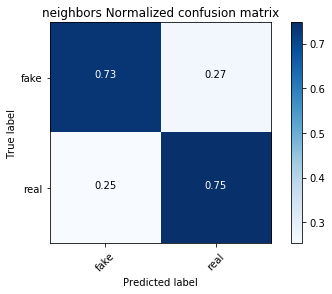

In [336]:
# Compute confusion matrix
for name, estimator in ESTIMATORS.items():
    cnf_matrix = confusion_matrix(y_test,y_test_predict[name] )
    np.set_printoptions(precision=2)

    class_names = ["fake","real"]
#     # Plot non-normalized confusion matrix
#     plt.figure()
#     plot_confusion_matrix(cnf_matrix, classes=class_names,
#                           title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title=name+' Normalized confusion matrix')

    plt.show()

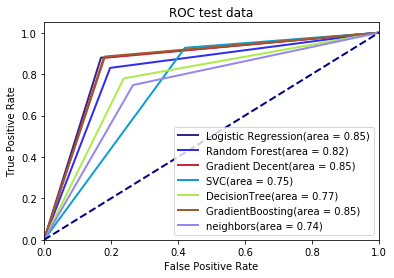

In [337]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

roc_auc = dict()

plt.figure()
lw = 2
def random_color():
    rgbl=[255,0,0]
    random.shuffle(rgbl)
    return tuple(rgbl)

for name, estimator in ESTIMATORS.items():
    #roc scores on test data
    fpr, tpr, _ = roc_curve(y_test, y_test_predict[name])
    auc = metrics.roc_auc_score(y_test, y_test_predict[name])
    
    #roc scores on training data
    fpr2, tpr2, _2 = roc_curve(y_train, y_train_predict[name])
    auc2 = metrics.roc_auc_score(y_train, y_train_predict[name])
    
    roc_auc[name] = (auc,auc2)
    plt.plot(fpr,
             tpr, 
             color = np.array(np.random.choice(range(256), size=3))/256, 
             lw=lw, 
             label=name+'(area = %0.2f)' % auc)
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC test data')
plt.legend(loc="lower right")
plt.show()

In [338]:
from pandas_ml import ConfusionMatrix
df_stats = pd.DataFrame()
for name, estimator in ESTIMATORS.items():
#     print(name)
    cm = ConfusionMatrix(y_test.values, y_test_predict[name])
#     print(cm.stats_class)
    
    df_stats = df_stats.append(
        pd.DataFrame([[roc_auc[name][1],roc_auc[name][0],  cm.PPV,cm.TPR,cm.F1_score,cm.ACC]],
                     columns=["Train ROC AUC","Test ROC AUC","Precision","Sensitivity","F1 Score","Accuracy"],
                    index = [name]))
#      cm.print_stats()
df_stats = df_stats.round(4)
df_stats

,Train ROC AUC,Test ROC AUC,Precision,Sensitivity,F1 Score,Accuracy
Logistic Regression,0.8686,0.8548,0.8725,0.8796,0.8760,0.8582
Random Forest,0.9950,0.8164,0.8477,0.8302,0.8388,0.8183
Gradient Decent,0.8682,0.8500,0.8669,0.8783,0.8726,0.8539
SVC,0.7636,0.7533,0.7446,0.9272,0.8259,0.7774
DecisionTree,0.9999,0.7708,0.8125,0.7795,0.7957,0.7720
GradientBoosting,0.8702,0.8516,0.8657,0.8849,0.8752,0.8562
neighbors,0.8144,0.7408,0.7882,0.7473,0.7672,0.7417


In [339]:
elapsed = timeit.default_timer() - start_time
elapsed

936.7129828720063

In [340]:
elapsed/60

15.61188304786677